<a href="https://colab.research.google.com/github/whatalnk/Gasyori100knockColab/blob/master/notebooks/Question_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [0]:
!mkdir -p "drive/My Drive/Gasyori100knock/Question_11_20"
%cd "drive/My Drive/Gasyori100knock/Question_11_20"

In [0]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori.jpg

In [0]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg

In [0]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_noise.jpg

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## Q11 平滑化フィルタ

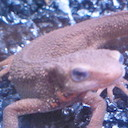

In [8]:
img = cv2.imread("imori.jpg")
cv2_imshow(img)

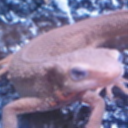

In [9]:
def smoothing_filter(img, size=3):
  H, W, C = img.shape
  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
  out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

  for y in range(H):
    for x in range(W):
      for c in range(C):
        out[y + pad, x + pad, c] = np.mean(img[y:y+size, x:x+size, c])
  
  out = np.clip(out, 0, 255)

  return out[pad:pad+H, pad:pad+W].astype(np.uint8)

out = smoothing_filter(img)
cv2_imshow(out)

## Q12 モーションフィルタ

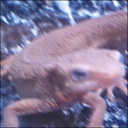

In [11]:
def motion_filter(img, size=3):
  H, W, C = img.shape

  pad = size // 2
  out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
  out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

  K = np.zeros((size, size), dtype=np.float)
  for x in range(-pad, -pad + size):
    for y in range(-pad, -pad + size):
      if x == y:
        K[y + pad, x + pad] = 1

  tmp = out.copy()

  for y in range(H):
    for x in range(W):
      for c in range(C):
        out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + size, x: x + size, c]) / size

  out = np.clip(out, 0, 255)
  out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

  return out
  
out = motion_filter(img)
cv2_imshow(out)

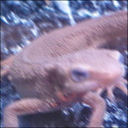

In [12]:
def motion_filter(img, K_size=3):
    H, W, C = img.shape

    # Kernel
    K = np.diag( [1] * K_size ).astype(np.float)
    K /= K_size

    # zero padding
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
    tmp = out.copy()

    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out
out = motion_filter(img)
cv2_imshow(out)